In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ds-project/cleaned_dataset.csv


In [2]:
import pandas as pd

# Load your data
df = pd.read_csv("/kaggle/input/ds-project/cleaned_dataset.csv")  # Replace with your actual file path


In [3]:
df

,Unnamed: 0,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Q50,Q51,Q52,Q53,Q54,Q56,Q57,Q58,Q59,Made online purchases
0,0,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",NaN,NaN,...,-1,0,0,0,0,0,0,-1,0,Yes
1,1,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",Patpat.lk,"Epharma.Lk, Onlinepharmacy.Lk",...,1,0,1,0,1,1,1,1,1,Yes
2,2,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com","Patpat.lk, Riyasewana.lk","Healthguard.Lk, Onlinepharmacy.Lk",...,0,1,2,1,1,1,2,2,1,Yes
3,3,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",LankaVehicle.com,Onlinepharmacy.Lk,...,1,0,1,0,1,1,1,1,1,Yes
4,4,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"Daraz.Lk, Wow.Lk",Riyasewana.lk,"Ceymed.Lk, Epharma.Lk",...,1,1,1,1,0,1,1,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,831,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,1,-1,1,1,1,1,1,Yes
793,832,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,1,1,1,Yes
794,833,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,0,1,0,Yes
795,834,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,0,0,0,Yes


In [4]:
# Construct groups with multiple questions
related_questions_lists = {
    "Perceived Ease of Use": ["Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"],
    "Perceived Usefulness": ["Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q30", "Q31", "Q32"],
    "Structural Assurance": ["Q33", "Q34", "Q35", "Q36", "Q37", "Q38"],
    "Social Influence (SI)": ["Q39", "Q40", "Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48", "Q49", "Q50"],
    "Intention to Purchase Online": ["Q57", "Q58", "Q59"]
}

# Question pairs (e.g., sub-dimensions)
related_question_pairs = {
    "Ease of Navigation": ["Q13", "Q14"],
    "Learn Curve": ["Q15", "Q16"],
    "Clarity of Instructions": ["Q17", "Q18"],
    "Response Time": ["Q19", "Q20"],
    "Error Handling": ["Q21", "Q22"],
    "Product Availability": ["Q23", "Q24"],
    "Convenience": ["Q25", "Q26"],
    "Cost-effectiveness": ["Q27", "Q28"],
    "Information Accessibility": ["Q29", "Q30"],
    "Personalization": ["Q31", "Q32"],
    "Privacy Protection": ["Q33", "Q34"],
    "Payment Security": ["Q35", "Q36"],
    "Transparent Policies": ["Q37", "Q38"],
    "Word of Mouth and Recommendations": ["Q39", "Q40"],
    "Social Media Posts/ Influence": ["Q41", "Q42"],
    "Online Reviews and Ratings": ["Q43", "Q44"],
    "Social Proof": ["Q45", "Q46"],
    "Normative Pressure": ["Q47", "Q48"],
    "Information Sharing": ["Q49", "Q50"],
    "Attitude": ["Q51", "Q52"],
    "Perceived Risk": ["Q53", "Q54"],
}

# ---- Step 1: Compute scores for constructs ----
for construct, questions in related_questions_lists.items():
    score_col = construct.replace(" ", "_").replace("(", "").replace(")", "") + "_Score"
    df[score_col] = df[questions].mean(axis=1)

# ---- Step 2: Compute scores for question pairs ----
for pair_name, questions in related_question_pairs.items():
    score_col = pair_name.replace(" ", "_").replace("/", "").replace("(", "").replace(")", "") + "_Score"
    df[score_col] = df[questions].mean(axis=1)

# ---- Step 3: Drop all question columns used ----
all_questions_used = set(
    [q for questions in related_questions_lists.values() for q in questions] +
    [q for questions in related_question_pairs.values() for q in questions]
)
df.drop(columns=list(all_questions_used), inplace=True)

# ---- Step 4: Check result ----
print(df.head())


   Unnamed: 0  Gender      Age Highest level of education  Marital Status  \
0           0    Male  25 - 35           Bachelor's Degree         Single   
1           1    Male  25 - 35           Bachelor's Degree         Single   
2           2  Female  25 - 35           Bachelor's Degree         Single   
3           3  Female  25 - 35   Master's Degree or higher        Married   
4           4    Male  25 - 35           Bachelor's Degree        Married   

  Have used online shopping platforms before  Professional Background  \
0                                         Yes    Employed (full-time)   
1                                         Yes    Employed (full-time)   
2                                         Yes    Employed (full-time)   
3                                         Yes    Employed (full-time)   
4                                         Yes    Employed (full-time)   

      General E-Commerce Platforms Specialty Online Stores / automobile  \
0               Daraz.L

#Q56 removed since it dicrease Cronbatch’salphacoefficientvalue

In [12]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def test_null_hypothesis(var1, var2):
    """
    Performs Spearman rank correlation test, prints results, and shows a scatter plot.

    Parameters:
    - var1, var2: Column names of df for numeric or ordinal variables.

    Prints:
    - Spearman rho value
    - p-value
    - Hypothesis test result (alpha = 0.05)

    Displays:
    - Scatter plot (without regression line, since Spearman does not assume linearity)
    """
    
    rho, p = spearmanr(df[var1], df[var2], nan_policy='omit')
    print(f"Spearman correlation (rho) = {rho:.3f}, p-value = {p:.4f}")

    if p < 0.05:
        print("Reject the null hypothesis (statistically significant monotonic correlation).")
    else:
        print("Fail to reject the null hypothesis (no statistically significant monotonic correlation).")

    # Plot (no regression line since Spearman does not assume linear relationship)
    sns.scatterplot(x=var1, y=var2, data=df)
    plt.title(f"Spearman Correlation: {var1} vs. {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 1.Convenience has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Convenience and intention to purchase online

Alternative hypothesis(H1):correlation exists between Convenience and intention to purchase online

Spearman correlation (rho) = 0.265, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


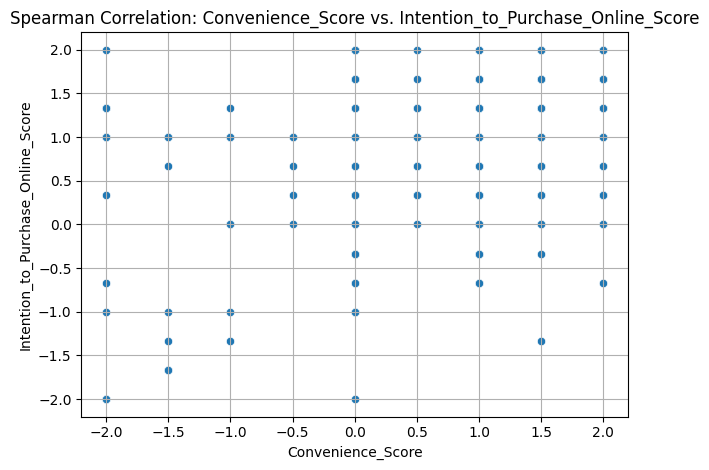

In [13]:
test_null_hypothesis("Convenience_Score","Intention_to_Purchase_Online_Score")

# 2.Online Reviews and Ratings has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Online Reviews and Ratings  and intention to purchase online

Alternative hypothesis(H1):correlation exists between Online Reviews and Ratings  and intention to purchase online

Spearman correlation (rho) = 0.345, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


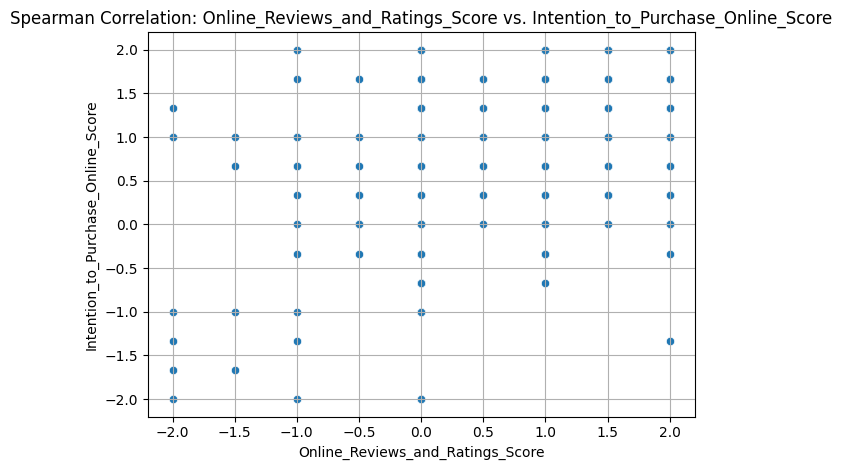

In [14]:
test_null_hypothesis("Online_Reviews_and_Ratings_Score","Intention_to_Purchase_Online_Score")

# 3.Normative Pressure has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Normative Pressure and intention to purchase online

Alternative hypothesis(H1):correlation exists between Normative Pressure  and intention to purchase online

Spearman correlation (rho) = 0.085, p-value = 0.0163
Reject the null hypothesis (statistically significant monotonic correlation).


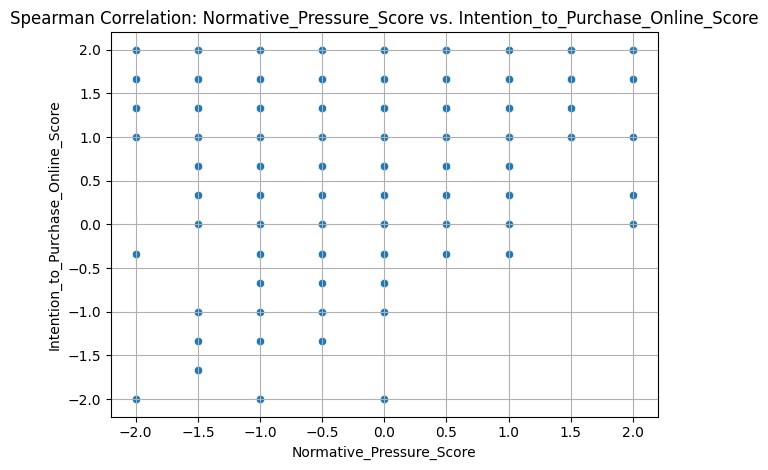

In [15]:
test_null_hypothesis("Normative_Pressure_Score","Intention_to_Purchase_Online_Score")

# 4.Personalization_Score has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Personalization and intention to purchase online

Alternative hypothesis(H1):correlation exists between Personalization  and intention to purchase online

Spearman correlation (rho) = 0.081, p-value = 0.0226
Reject the null hypothesis (statistically significant monotonic correlation).


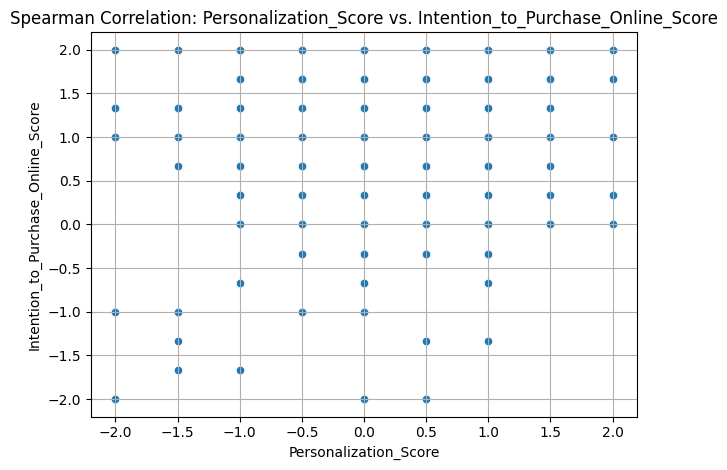

In [16]:
test_null_hypothesis("Personalization_Score","Intention_to_Purchase_Online_Score")

# 5.Word_of_Mouth_and_Recommendations has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Word_of_Mouth_and_Recommendations and intention to purchase online

Alternative hypothesis(H1):correlation exists between Word_of_Mouth_and_Recommendations  and intention to purchase online

Spearman correlation (rho) = 0.207, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


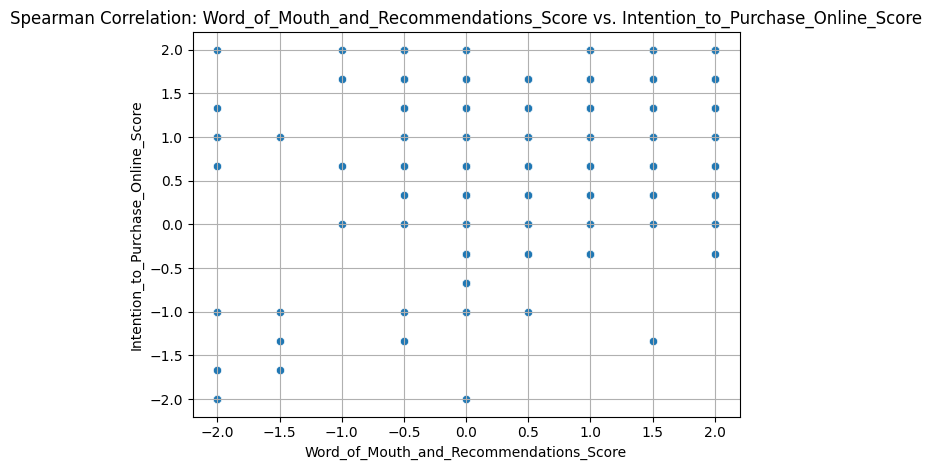

In [17]:
test_null_hypothesis("Word_of_Mouth_and_Recommendations_Score","Intention_to_Purchase_Online_Score")

# 6.Product_Availability has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Product_Availability and intention to purchase online

Alternative hypothesis(H1):correlation exists between Product_Availability  and intention to purchase online

Spearman correlation (rho) = 0.147, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


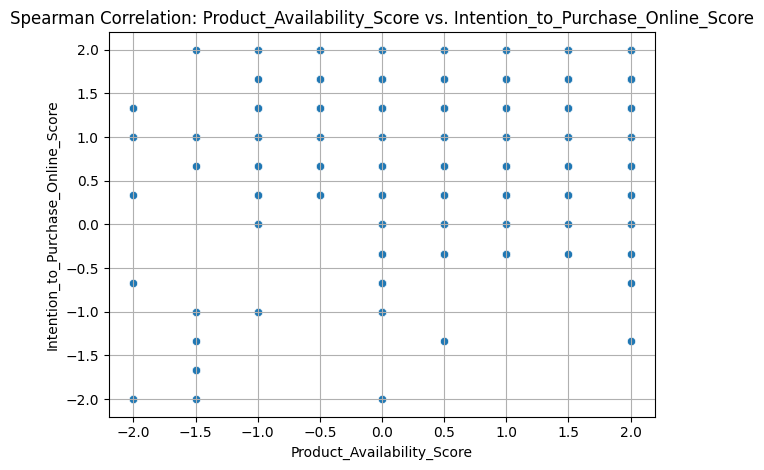

In [18]:
test_null_hypothesis("Product_Availability_Score","Intention_to_Purchase_Online_Score")

# 7.Social_Media_Posts_Influence has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Social_Media_Posts_Influence and intention to purchase online

Alternative hypothesis(H1):correlation exists between Social_Media_Posts_Influence  and intention to purchase online

Spearman correlation (rho) = 0.201, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


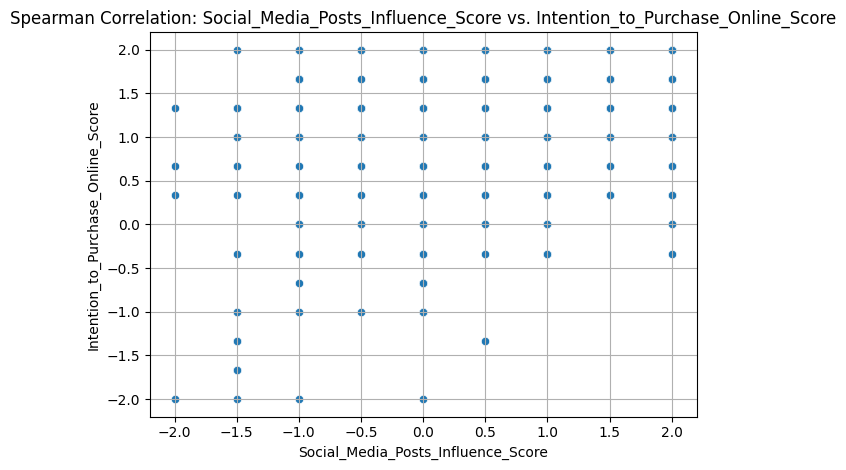

In [19]:
test_null_hypothesis("Social_Media_Posts_Influence_Score","Intention_to_Purchase_Online_Score")

# 8.Learn_Curve has no impact on intention to purchase online

Null hypothesis(H0): no correlation between Learn_Curve and intention to purchase online

Alternative hypothesis(H1):correlation exists between Learn_Curve  and intention to purchase online

Spearman correlation (rho) = 0.230, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


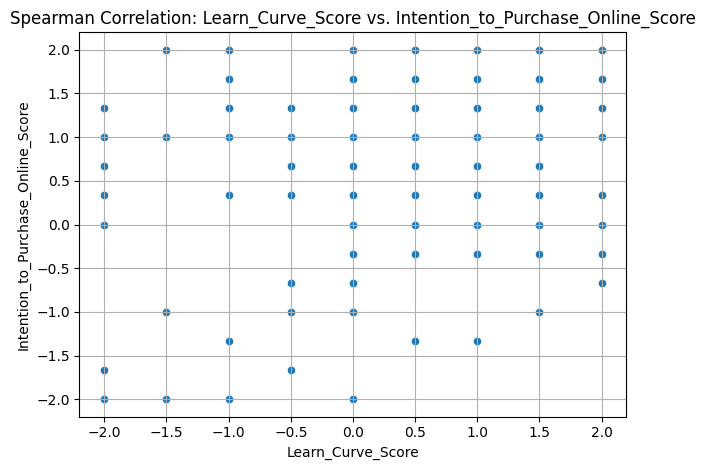

In [20]:
test_null_hypothesis("Learn_Curve_Score","Intention_to_Purchase_Online_Score")

# 9.  The attitude towards online shopping does not mediate the relationship between Social_Influence(SI) and the intention to purchase online.

Null hypothesis(H0):The attitude towards online shopping does not mediate the relationship between Social_Influence(SI) and the intention to purchase online.
Alternative hypothesis(H1):The attitude towards online shopping mediate the relationship between Social_Influence(SI) and the intention to purchase online.

# i. Test Path a (SI Score → Attitude)

In [23]:
import statsmodels.api as sm
X1 = sm.add_constant(df["Social_Influence_SI_Score"])
model_mediator = sm.OLS(df["Attitude_Score"], X1).fit()
print(model_mediator.summary())

                            OLS Regression Results                            
Dep. Variable:         Attitude_Score   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 14 May 2025   Prob (F-statistic):           3.70e-38
Time:                        05:45:26   Log-Likelihood:                -693.44
No. Observations:                 797   AIC:                             1391.
Df Residuals:                     795   BIC:                             1400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 


* Coefficient (a): 0.4791 (p < 0.001, CI [0.410, 0.548])

* Significant? Yes.

* Interpretation: Social media influence significantly increases positive Attitude toward online shopping.

# ii.Test Path (Total Effect: SI Score → Purchase Intention)**

In [25]:
X2 = sm.add_constant(df["Social_Influence_SI_Score"])
model_total = sm.OLS(df["Intention_to_Purchase_Online_Score"], X2).fit()
print(model_total.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Intention_to_Purchase_Online_Score   R-squared:                       0.130
Model:                                            OLS   Adj. R-squared:                  0.129
Method:                                 Least Squares   F-statistic:                     118.8
Date:                                Wed, 14 May 2025   Prob (F-statistic):           7.15e-26
Time:                                        05:52:50   Log-Likelihood:                -727.57
No. Observations:                                 797   AIC:                             1459.
Df Residuals:                                     795   BIC:                             1468.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                coef    std err   


* Coefficient (c): 0.3999 (p < 0.001, CI [0.328, 0.472])

* Significant? Yes.

* Interpretation: Social media influence has a significant positive effect on purchase intention without including the mediator (Attitude).

# iii.Test Paths b and c' (SI Score + Attitude → Purchase Intention)**


In [26]:
X3 = sm.add_constant(df[["Social_Influence_SI_Score", "Attitude_Score"]])
model_direct = sm.OLS(df["Intention_to_Purchase_Online_Score"], X3).fit()
print(model_direct.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Intention_to_Purchase_Online_Score   R-squared:                       0.313
Model:                                            OLS   Adj. R-squared:                  0.312
Method:                                 Least Squares   F-statistic:                     181.2
Date:                                Wed, 14 May 2025   Prob (F-statistic):           1.51e-65
Time:                                        06:11:30   Log-Likelihood:                -633.23
No. Observations:                                 797   AIC:                             1272.
Df Residuals:                                     794   BIC:                             1286.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                coef    std err   


* Coefficient (1): 0.4792 (p < 0.001, CI [0.415, 0.544])

* Significant? Yes. Attitude strongly predicts purchase intention.

* Coefficient (2): 0.1703 (p = 0.014, CI [0.099, 0.241])

* Significant? Yes, but reduced from 0.3999 (Path c).

* Interpretation:The effect of SI Score on purchase intention weakens when Attitude is added, but remains significant → Partial Mediation.

****Mediation analysis revealed a significant indirect effect of Social Influence(SI) on Purchase Intention through Attitude. The direct effect of SI scure decreasedwhen Attitude was included, indicating partial mediation. Thus, we reject the null hypothesis that Attitude does not mediate this relationship.****

# 10. Perceived Risk mediates the relationship between Structural Assurance and Intention to Purchase Online during a crisis in Sri Lanka.

Null Hypothesis(H0):Perceived Risk does not mediates the relationship between Structural Assurance and Intention to Purchase Online during a crisis in Sri Lanka.

Alternative Hypothesis(H1):Perceived Risk mediates the relationship between Structural Assurance and Intention to Purchase Online during a crisis in Sri Lanka.

# i.Path (SA → Perceived Risk)

In [29]:
import statsmodels.api as sm

X1 = sm.add_constant(df["Structural_Assurance_Score"])
model_mediator = sm.OLS(df["Perceived_Risk_Score"], X1).fit()
print(model_mediator.summary())

                             OLS Regression Results                             
Dep. Variable:     Perceived_Risk_Score   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     19.11
Date:                  Wed, 14 May 2025   Prob (F-statistic):           1.40e-05
Time:                          06:35:19   Log-Likelihood:                -811.50
No. Observations:                   797   AIC:                             1627.
Df Residuals:                       795   BIC:                             1636.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------




* Coefficient (a): 0.1848 (p < 0.001, CI [0.102, 0.268])

* Interpretation: Higher SA leads to higher Perceived Risk 

#  ii.Path : SA → Purchase Intention

In [28]:
import statsmodels.api as sm

X1 = sm.add_constant(df["Structural_Assurance_Score"])
model_mediator = sm.OLS(df["Intention_to_Purchase_Online_Score"], X1).fit()
print(model_mediator.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Intention_to_Purchase_Online_Score   R-squared:                       0.078
Model:                                            OLS   Adj. R-squared:                  0.077
Method:                                 Least Squares   F-statistic:                     67.69
Date:                                Wed, 14 May 2025   Prob (F-statistic):           7.81e-16
Time:                                        06:32:59   Log-Likelihood:                -750.49
No. Observations:                                 797   AIC:                             1505.
Df Residuals:                                     795   BIC:                             1514.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                 coef    std err  



* Coefficient: 0.3221 (p < 0.001, CI [0.245,0.399])

* Interpretation: Without considering Perceived Risk, SA has a significant positive effect on purchase intention.

# iii. Paths (SA + Perceived Risk → Purchase Intention)

In [30]:

X3 = sm.add_constant(df[["Structural_Assurance_Score", "Perceived_Risk_Score"]])
model_direct = sm.OLS(df["Intention_to_Purchase_Online_Score"], X3).fit()
print(model_direct.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Intention_to_Purchase_Online_Score   R-squared:                       0.289
Model:                                            OLS   Adj. R-squared:                  0.287
Method:                                 Least Squares   F-statistic:                     161.4
Date:                                Wed, 14 May 2025   Prob (F-statistic):           1.56e-59
Time:                                        06:39:18   Log-Likelihood:                -647.13
No. Observations:                                 797   AIC:                             1300.
Df Residuals:                                     794   BIC:                             1314.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                 coef    std err  

*  From above: PR → Intention (significant: β = 0.4428, p < 0.001).
*  SA still predicts Intention even after controlling for PR, but the coefficient dropped (from 0.3221 → 0.2403),
*   This indicates partial mediation by Perceived Risk.

**The mediation analysis shows a partial mediation effect of Perceived Risk between Structural Assurance and Intention to Purchase Online. The direct effect of Structural Assurance decreased from β = 0.3221 (p < 0.001) to β = 0.2403 (p < 0.001) when Perceived Risk was included, suggesting a significant indirect pathway. Thus, we reject the null hypothesis that Perceived Risk does not mediate the relationship.**